In [90]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np
import random

# Read in the dataset
df = pd.read_csv('_2afcDemo_2021_Nov_11_1254.csv')

# Extract the columns of interest
df = df[["key_resp_3.keys", "key_resp_3.corr", "key_resp_3.rt", "key_resp_4.keys", "degree"]]
df.columns = ["resp", "corr", "rt", "conf", "stimDeg"]

In [91]:
df.head()
# We can see there's a few NaN values. Shoudn't matter too much but let just clean it

,resp,corr,rt,conf,stimDeg
0,NaN,NaN,NaN,NaN,NaN
1,right,0.0,0.813306,3.0,1.0
2,right,0.0,0.743841,4.0,3.0
3,right,1.0,0.698095,3.0,3.0
4,left,1.0,0.817631,3.0,2.0


In [92]:
df = df.dropna() # drop the rows that only contain NaN
df.head()

,resp,corr,rt,conf,stimDeg
1,right,0.0,0.813306,3.0,1.0
2,right,0.0,0.743841,4.0,3.0
3,right,1.0,0.698095,3.0,3.0
4,left,1.0,0.817631,3.0,2.0
5,right,1.0,0.547027,4.0,3.0


<AxesSubplot:xlabel='stimDeg', ylabel='corr'>

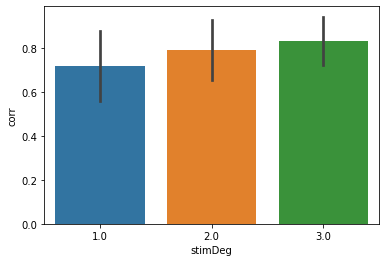

In [93]:
# A quick look at the data itself 
fig, ax = plt.subplots()
sns.barplot(x='stimDeg', y='corr', data=df, ax=ax)

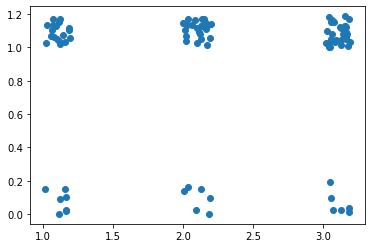

In [96]:
# Also do a scatter plot and add some jitter. 

def jitter(lst,intensity=0.2):
    """ Add a random value to each value in a list"""
    return [random.random()*intensity+x for x in lst]

x = df['stimDeg']
y = df['corr']
x = jitter(x)
y = jitter(y)

plt.scatter(x,y)


In [99]:
model = smf.glm(formula = 'corr ~ stimDeg', data=df, family=sm.families.Binomial())
alternate_hypothesis = model.fit()
print(alternate_hypothesis.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   corr   No. Observations:                   90
Model:                            GLM   Df Residuals:                       88
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -45.836
Date:                Thu, 18 Nov 2021   Deviance:                       91.672
Time:                        10:53:30   Pearson chi2:                     90.0
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6335      0.685      0.925      0.3

In [133]:
alternate_hypothesis.deviance

91.67185000598788

In [98]:
model = smf.glm(formula = 'corr ~ 1', data=df, family=sm.families.Binomial())
null_hypothesis = model.fit()
print(null_hypothesis.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                   corr   No. Observations:                   90
Model:                            GLM   Df Residuals:                       89
Model Family:                Binomial   Df Model:                            0
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -46.388
Date:                Thu, 18 Nov 2021   Deviance:                       92.777
Time:                        10:52:32   Pearson chi2:                     90.0
No. Iterations:                     4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3182      0.258      5.104      0.0

**Interpretation of the logistic regression equation**<br>
*Estimated probability of correct response is 0.836*

$log(\frac{p}{1-p}) = 0.6335+0.3326∗3 = 1.6313$
<br><br>
$\frac{p}{1-p} = exp(1.6314) = 5.1105$
<br><br>
$p = 0.8363$

In [107]:
# Now with code
def model_prediction(x, model):
    return model.params['Intercept'] + model.params['stimDeg'] * x

prediction = model_prediction(3, alternate_hypothesis)

from scipy.stats import logistic
# Calculate the cummulative density function
logistic.cdf(prediction)

0.8363486943398135

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(0.0, 0.27)

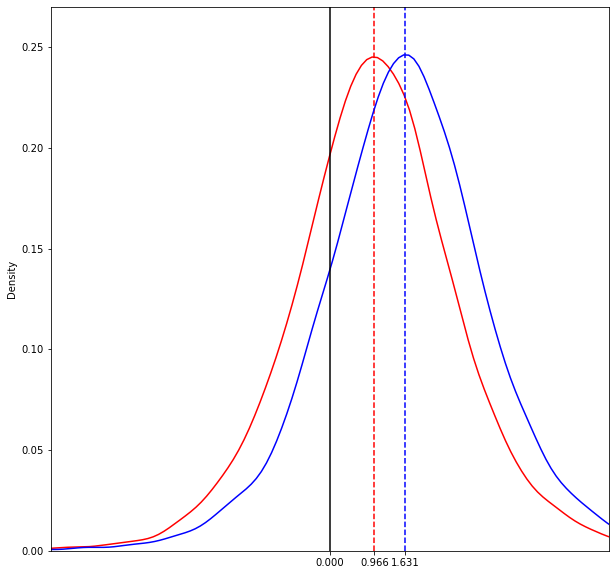

In [132]:
fig, ax = plt.subplots(figsize=(10,10))

x_ticks = []

for x, color in zip([1, 3], ['red','blue']):
    loc = h1_fun(x, h1)
    s = np.random.logistic(loc, 1, 10000)
    sns.distplot(s, hist=False, color=color)
    ax.plot([loc, loc], [0, 0.27], c=color, linestyle='--')
    x_ticks.append(loc)
    

plt.plot([0,0],[0,0.5], c='black')
x_ticks.append(0)

ax.set_xticks(x_ticks)

# Arbitrary limits to get a good view
ax.set_xlim([-6, 6])
ax.set_ylim([0,0.27])